In [25]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import pandas as pd
import yfinance as yf
import mplfinance as mpf

In [28]:
start = '2020-01-01'
end = '2021-12-01'

In [29]:
data = yf.download('ETH-USD', start=start)

[*********************100%***********************]  1 of 1 completed


In [30]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,129.630661,132.835358,129.198288,130.802002,130.802002,7935230330
2020-01-02,130.820038,130.820038,126.954910,127.410179,127.410179,8032709256
2020-01-03,127.411263,134.554016,126.490021,134.171707,134.171707,10476845358
2020-01-04,134.168518,136.052719,133.040558,135.069366,135.069366,7430904515
2020-01-05,135.072098,139.410202,135.045624,136.276779,136.276779,7526675353
...,...,...,...,...,...,...
2022-12-09,1281.077271,1290.055420,1260.818726,1264.284790,1264.284790,5706183865
2022-12-10,1264.375488,1279.527954,1262.119873,1266.384155,1266.384155,3282499999
2022-12-11,1266.417847,1281.783203,1260.663696,1263.868530,1263.868530,3362005848


In [31]:
def get_bbands(df, period):
  df = data.copy()
  df['sma'] = data.Close.rolling(period).mean()
  df['upper'] = data.Close.rolling(period).mean() + (2*data.Close.rolling(period).std())
  df['lower'] = data.Close.rolling(period).mean() - (2*data.Close.rolling(period).std())

  return df

In [32]:
df = get_bbands(data, 14)

In [33]:
df

,Open,High,Low,Close,Adj Close,Volume,sma,upper,lower
Date,,,,,,,,,
2020-01-01,129.630661,132.835358,129.198288,130.802002,130.802002,7935230330,NaN,NaN,NaN
2020-01-02,130.820038,130.820038,126.954910,127.410179,127.410179,8032709256,NaN,NaN,NaN
2020-01-03,127.411263,134.554016,126.490021,134.171707,134.171707,10476845358,NaN,NaN,NaN
2020-01-04,134.168518,136.052719,133.040558,135.069366,135.069366,7430904515,NaN,NaN,NaN
2020-01-05,135.072098,139.410202,135.045624,136.276779,136.276779,7526675353,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-09,1281.077271,1290.055420,1260.818726,1264.284790,1264.284790,5706183865,1249.074201,1327.852328,1170.296075
2022-12-10,1264.375488,1279.527954,1262.119873,1266.384155,1266.384155,3282499999,1253.394645,1328.522426,1178.266863
2022-12-11,1266.417847,1281.783203,1260.663696,1263.868530,1263.868530,3362005848,1258.304757,1325.605794,1191.003721


In [34]:
apd = mpf.make_addplot(df[['upper','lower','sma']])

/usr/local/lib/python3.8/dist-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


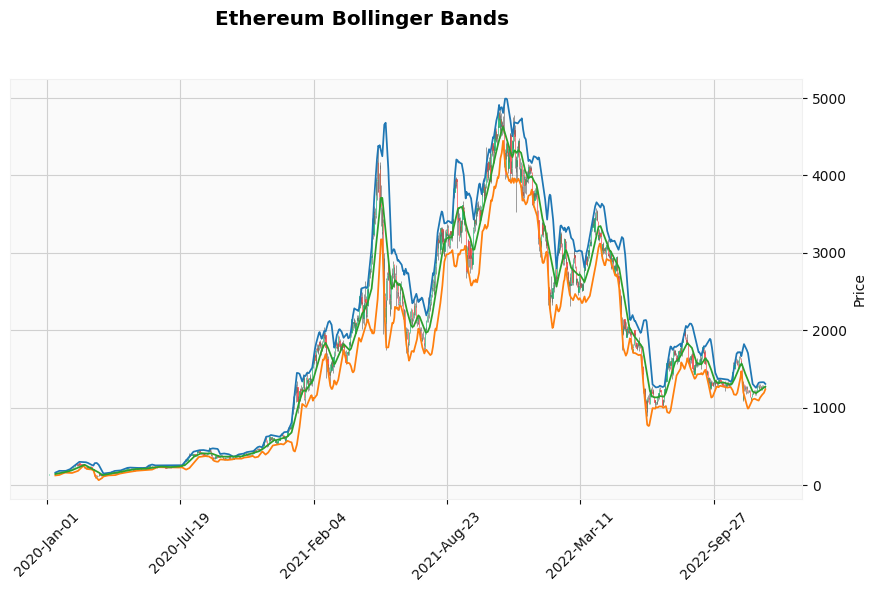

In [35]:
mpf.plot(df, type='candle', style='yahoo', addplot=apd, title='Ethereum Bollinger Bands', figsize=(11,6))

In [36]:
def get_ebbands(data, period):
  df2 = data.copy()
  df2['ema'] = data.Close.ewm(span=period, adjust=False, min_periods=period).mean()
  df2['upper'] = data.Close.ewm(span=period, adjust=False, min_periods=period).mean() + (2*data.Close.ewm(span=period, adjust=False, min_periods=period).std())
  df2['lower'] = data.Close.ewm(span=period, adjust=False, min_periods=period).mean() - (2*data.Close.ewm(span=period, adjust=False, min_periods=period).std())

  return df2

In [37]:
df2 = get_ebbands(data, 14)

In [38]:
apd2 = mpf.make_addplot(df2[['upper','lower','ema']])

/usr/local/lib/python3.8/dist-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


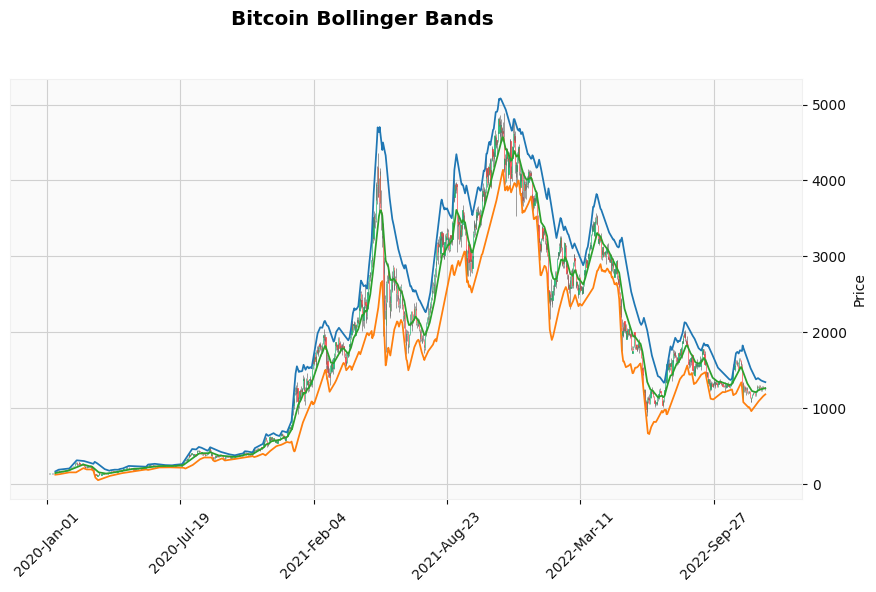

In [39]:
mpf.plot(df2, type='candle', style='yahoo', addplot=apd2, title='Bitcoin Bollinger Bands', figsize=(11,6))